Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

### <font color='orange'>Общее впечатление</font>
* Этот проект очень хорошо выполнен. Видно что приложено много усилий.
* Понравилась, как ты работаешь с функциями.
* Выводы логичны и понятны, благодаря структурированности их приятно читать!
* Я оставил немного комментариев, с советами и неточностями, обрати на них внимаение
* Жду с нетерпением твою дополненную работу. Не забудь поменять выводы ( если это потребуется ).


### <font color='orange'>Общее впечатление[2]</font>
* Спасибо за оперативые правки своего проекта!
* Я рад, что ты углубился в тему балансировку данных глубже, чем это требуется в проекте, и изучил методы для борьбы дисбаланса так хорошо.
* Все шаги твои сделаны верно, я принимаю твой проект и желаю удачи в дальнейшем!


<div class="alert alert-warning">
  <h3>Комментарий студента</h3> Не смог установить бибилотеку <font color='green'>imblearn </font> в JupiterHub от Яндекс.Практикума - выдавлась ошибка о старой версии, обновить её тоже не смог. Пришлось скачать на компьютер Anacoda. 
  </div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

#### Необходимо проделать следующие действия:
1. Загрузить и подготовить данные.
2. Исследовать баланс классов, обучить модель без учёта дисбаланса. Пояснить выводы.
3. Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели, выбрать лучшую. Кратко описать выводы.
4. Провести финальное тестирование, добиться необходимого значения F1.

<div class="alert alert-block alert-success">
<b>Успех:</b> Спасибо за описание проекта, и план работы!
</div>

# 1. Подготовка данных

### 1.1 Чтение данных

In [152]:
#Импорт библиотек
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
import scipy.stats as sps
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import seaborn as sns
import matplotlib.pyplot as plt

Requirement already up-to-date: imbalanced-learn in c:\users\chugu\anaconda3\lib\site-packages (0.7.0)


In [153]:
#Чтение и подготовка данных
churn_data = pd.read_csv("/Users/chugu/Learning DS/Projects/Churn.csv")
print(churn_data.info())
display(churn_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


### Вывод
Данные содержат пропуски в столбце `Tenure`. Они, вероятно, обозначают отсутствие недвижимость у клиента, следовательно, пропуски необходимо заменить на нулевые значения.

Некоторые признаки очевидно не влияют на признаки - такие как фамилия, `RowNumber` и `CustomerId` не влияют на уход клиента. Их можно не учитывать при отборе признаков. В дальнейшем, если признаков было бы больше, их отбор необходимо было бы доказать, использовав какой-либо из критериев - Фишера, Хи-квадрат, использовать матрицу корреляций и т.д. 

Страна и пол являются категориальными признаками. Их необходимо привести к численному виду. Все признаки сильно различаются в абсолютных значениях, их требуется масштабировать.

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка данных и их  анализ сделано хорошо!
</div>


### 1.2 Непосредственная подготовка данных

In [154]:
#Замена NaN на 0 в Tensure
churn_data['Tenure'] = churn_data['Tenure'].fillna(0)

#преобразование признаков методом порядкового кодирования
encoder = OrdinalEncoder()
churn_data[['Gender', 'Geography']] = encoder.fit_transform(churn_data[['Gender', 'Geography']])
#display(churn_data.head(10))

In [155]:
#отбор признаков
features = churn_data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
target = churn_data['Exited']

def feat_targ_split(features, target):
    features_train, features_valid_test, target_train, target_valid_test = train_test_split(
        features, target, test_size=0.4, random_state=12345, stratify=churn_data['Exited']) 

    features_valid, features_test, target_valid, target_test = train_test_split(
        features_valid_test, target_valid_test, test_size=0.5, random_state=12345)
    return features_train, features_valid, features_test, target_train, target_valid, target_test

features_train, features_valid, features_test, target_train, target_valid, target_test = feat_targ_split(features, target)


In [156]:
#Масштабирование признаков
def scale_feature(f_train, f_valid, f_test):
    scaler = StandardScaler()
    scaler.fit(f_train) 
    f_train_scaled = scaler.transform(f_train)
    f_valid_scaled = scaler.transform(f_valid) 
    f_test_scaled = scaler.transform(f_test) 
    return f_train_scaled, f_valid_scaled, f_test_scaled

features_train_scaled, features_valid_scaled, features_test_scaled = scale_feature(features_train, features_valid, features_test)


<div class="alert alert-block alert-info">
<b>Совет: </b>Советую логически разбивать такие ячейки, чтобы код был читабельнее. <br> И собирать импорты в начале проекта. Так как человек запускающий твой проект целиком при отсутствии какого-либо пакета узнает это сразу, а не посреди выполнения.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг сделан верно! <br> Разбиение выполнено корректно.<br> Scaler обучен только на трейне!
</div>


### Вывод
Использовалось порядковое кодирование, т.к. названий локаций достаточно много, чтобы создавать отдельный столбец под каждую, используя One hot encoding.
Признаки приведены к одному масштабу, чтобы разные признаки имели равную значимость.

# 2. Исследование задачи

### 2.1 Обучение модели без учёта дисбаланса

#### Модель дерево решений

In [157]:
#Функция обучения модели дерева решений
def decision_tree_model(f_train, t_train, f_valid, t_valid, depth_max):
    best_decision_model = None
    best_decision_result = 0
    for depth in range(1, depth_max, 2):
        churn_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
        churn_model.fit(f_train, t_train) 
        churn_predicted_valid = churn_model.predict(f_valid) 
        result = f1_score(t_valid, churn_predicted_valid)
        if result > best_decision_result:
            best_decision_model = churn_model
            best_decision_result = result
    print('Таблица параметров')
    print(classification_report(t_valid, best_decision_model.predict(f_valid), target_names=['Клиент остаётся', 'Уходит']))
    return best_decision_model, best_decision_result

In [158]:
tree_model, tree_result = decision_tree_model(features_train_scaled, target_train, features_valid_scaled, target_valid, 51)
print('F-1 мера дерева решений несбалансированных классов {:.4f}'.format(tree_result))

Таблица параметров
                 precision    recall  f1-score   support

Клиент остаётся       0.88      0.96      0.92      1609
         Уходит       0.73      0.45      0.55       391

       accuracy                           0.86      2000
      macro avg       0.80      0.70      0.73      2000
   weighted avg       0.85      0.86      0.85      2000

F-1 мера дерева решений несбалансированных классов 0.5533


#### Модель случайный лес

In [159]:
#Функция обучения модели случайного леса
def random_tree_model(f_train, t_train, f_valid, t_valid, depth_max):
    best_model = None
    best_result = 0
    for est in range(10, depth_max, 5):
        for depth in range (1, 15):
            churn_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
            churn_model.fit(f_train, t_train) 
            churn_predicted_valid = churn_model.predict(f_valid) 
            result = f1_score(t_valid, churn_predicted_valid)
            if result > best_result:
                best_model = churn_model 
                best_result = result
    print('Таблица параметров')
    print(classification_report(t_valid, best_model.predict(f_valid), target_names=['Клиент остаётся', 'Уходит']))    
    return best_model, best_result                

In [160]:
random_model, random_result = random_tree_model(features_train_scaled, target_train, features_valid_scaled, target_valid, 51)
print('F-1 мера случайного леса несбалансированных классов {:.4f}'.format(random_result))

Таблица параметров
                 precision    recall  f1-score   support

Клиент остаётся       0.88      0.97      0.92      1609
         Уходит       0.79      0.45      0.57       391

       accuracy                           0.87      2000
      macro avg       0.83      0.71      0.75      2000
   weighted avg       0.86      0.87      0.85      2000

F-1 мера случайного леса несбалансированных классов 0.5710


### Вывод
Критерий слишком низок, чтобы принять какую-либо модель за рабочую - в обоих случаях не предсказывается уход клиента. 
Это может быть вызвано недостатком данных - несбалансированностью классов.

### 2.2 Анализ модели

In [161]:
#Функция для оценки модели
def roc_curve_plot(model, features_valid, target_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    
    #Поиск Area Under Curve ROC
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    plt.figure(figsize=(10, 10))

    plt.plot(fpr, tpr, label='Обученная модель')

    # ROC-кривая случайной модели (выглядит как прямая)
    plt.plot([0, 1], [0, 1], linestyle='--', color = 'crimson', label='Случайная модель')

    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    #оси "False Positive Rate" и "True Positive Rate" 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    #"ROC-кривая" функцией plt.title() 
    plt.title('ROC-кривая')
    
    plt.text(0.405, 0.3, 'AUC=', color = 'black', fontsize = 40)
    plt.text(0.605, 0.3, round(auc_roc, 3), color = 'black', fontsize = 40)
    
    plt.grid()
    plt.legend()
    plt.show()

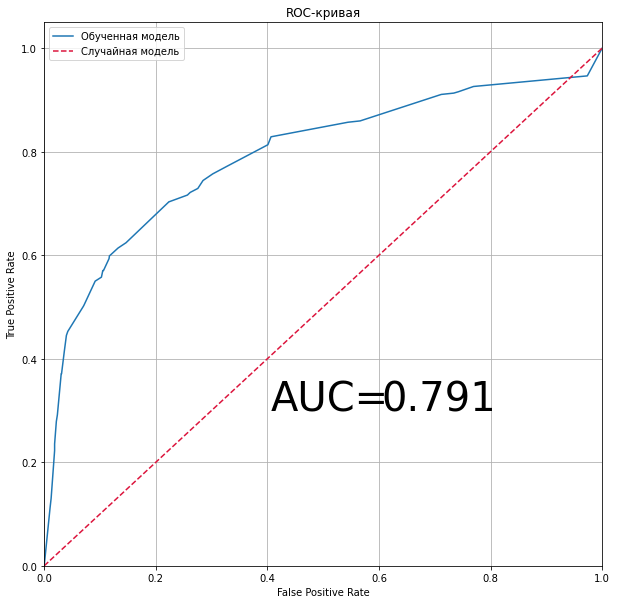

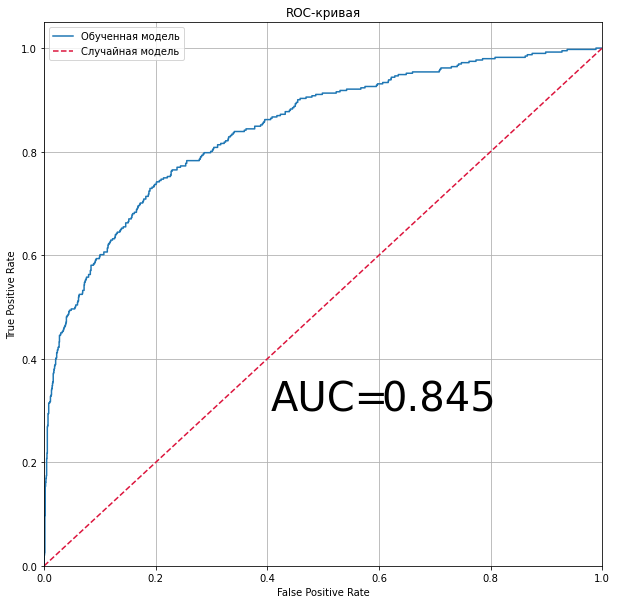

In [162]:
#Построение ROC-кривой для моделей дерева решений и случайного леса
roc_curve_plot(tree_model, features_valid_scaled, target_valid) 
roc_curve_plot(random_model, features_valid_scaled, target_valid) 

### Вывод
Хоть кривая обученных моделей и лежит значительно выше случайной, этого все равно недостаточно. Необходимо проверить, какя картина будет при балансировке.
Пока что модель случайного леса показывает результаты лучше.

<div class="alert alert-block alert-success">
<b>Успех:</b> Анализ выполнен верно, все нужные метрики посчитаны!
</div>


# 3. Борьба с дисбалансом

### 3.1 Простой upsampling

#### Подготовка признаков

In [163]:
#Разбиение по классам
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4778, 10)
(1222, 10)
(4778,)
(1222,)


In [164]:
#Увеличение классов и их перетасовка
repeat = round(len(features_zeros)/len(features_ones))
features_train_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_train_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
features_train_upsampled, target_train_upsampled = shuffle(features_train_upsampled, target_train_upsampled, random_state=12345)
print(features_train_upsampled.shape)
print(target_train_upsampled.shape)
print('Коэффициент увеличения выборки ', repeat)

(9666, 10)
(9666,)
Коэффициент увеличения выборки  4


#### Проверка на дереве решений

In [165]:
features_train_upsampled, features_valid_scaled, features_test_scaled = scale_feature(
    features_train_upsampled, features_valid, features_test)

In [166]:
tree_model_balanced, tree_result_balanced = decision_tree_model(
    features_train_upsampled, target_train_upsampled, features_valid_scaled, target_valid, 101)
print('F-1 мера дерева решений сбалансированных классов {:.4f}'.format(tree_result_balanced))

Таблица параметров
                 precision    recall  f1-score   support

Клиент остаётся       0.92      0.76      0.83      1609
         Уходит       0.43      0.74      0.54       391

       accuracy                           0.75      2000
      macro avg       0.67      0.75      0.69      2000
   weighted avg       0.83      0.75      0.78      2000

F-1 мера дерева решений сбалансированных классов 0.5410


#### Проверка на случайном лесе

In [167]:
random_model_balanced, random_result_balanced = random_tree_model(
    features_train_upsampled, target_train_upsampled, features_valid_scaled, target_valid, 51)
print('F-1 мера случайного леса сбалансированных классов {:.4f}'.format(random_result_balanced))

Таблица параметров
                 precision    recall  f1-score   support

Клиент остаётся       0.93      0.84      0.88      1609
         Уходит       0.52      0.74      0.61       391

       accuracy                           0.82      2000
      macro avg       0.73      0.79      0.75      2000
   weighted avg       0.85      0.82      0.83      2000

F-1 мера случайного леса сбалансированных классов 0.6115


#### Итог
Качество моделей улучшилось, но все равно низко. Необходимо проверить более совершенные виды балансировки выборки.

### 3.2 SMOTE sampling

#### Cоздание близкорасположенных элементов

In [168]:
features_train, features_valid, features_test, target_train, target_valid, target_test = feat_targ_split(features, target)

features_train_scaled, features_valid_scaled, features_test_scaled = scale_feature(features_train, features_valid, features_test)

In [169]:
sm = SMOTE(sampling_strategy='minority', random_state=12345, k_neighbors=4) #увеличение кол-ва только недостающих признаков
sm_train_scaled, sm_target_train = sm.fit_sample(features_train_scaled, target_train)

#### Проверка на дереве решений

In [170]:
sm_tree_model, sm_tree_result = decision_tree_model(
    sm_train_scaled, sm_target_train, features_valid_scaled, target_valid, 101)
print('F-1 мера дерева решений используя SMOTE {:.4f}'.format(sm_tree_result))

Таблица параметров
                 precision    recall  f1-score   support

Клиент остаётся       0.90      0.85      0.88      1609
         Уходит       0.50      0.63      0.56       391

       accuracy                           0.81      2000
      macro avg       0.70      0.74      0.72      2000
   weighted avg       0.83      0.81      0.81      2000

F-1 мера дерева решений используя SMOTE 0.5587


#### Проверка на случайном лесе

In [171]:
sm_random_model, sm_random_result = random_tree_model(
    sm_train_scaled, sm_target_train, features_valid_scaled, target_valid, 51)
print('F-1 мера случайного леса используя SMOTE {:.4f}'.format(sm_random_result))

Таблица параметров
                 precision    recall  f1-score   support

Клиент остаётся       0.91      0.89      0.90      1609
         Уходит       0.59      0.62      0.60       391

       accuracy                           0.84      2000
      macro avg       0.75      0.76      0.75      2000
   weighted avg       0.84      0.84      0.84      2000

F-1 мера случайного леса используя SMOTE 0.6030


#### Итог 
Используя алгоритм SMOTE, было получено удовлетворительное качество модели случайного леса. Далее будет использован схожий со SMOTE алгоритм - TomekLinks. 

### 3.3 TomekLinks

In [172]:
tl = TomekLinks(sampling_strategy='majority') 
tl_train_scaled, tl_target_train = tl.fit_sample(features_train_scaled, target_train)

#### Проверка на дереве решений

In [173]:
tl_tree_model, tl_tree_result = decision_tree_model(
    tl_train_scaled, tl_target_train, features_valid_scaled, target_valid, 101)
print('F-1 мера дерева решений используя SMOTE {:.4f}'.format(tl_tree_result))

Таблица параметров
                 precision    recall  f1-score   support

Клиент остаётся       0.88      0.92      0.90      1609
         Уходит       0.61      0.49      0.54       391

       accuracy                           0.84      2000
      macro avg       0.75      0.71      0.72      2000
   weighted avg       0.83      0.84      0.83      2000

F-1 мера дерева решений используя SMOTE 0.5447


#### Проверка на случайном лесе

In [174]:
tl_random_model, tl_random_result = random_tree_model(
    tl_train_scaled, tl_target_train, features_valid_scaled, target_valid, 51)
print('F-1 мера случайного леса используя SMOTE {:.4f}'.format(tl_random_result))

Таблица параметров
                 precision    recall  f1-score   support

Клиент остаётся       0.89      0.96      0.92      1609
         Уходит       0.74      0.49      0.59       391

       accuracy                           0.87      2000
      macro avg       0.81      0.72      0.76      2000
   weighted avg       0.86      0.87      0.86      2000

F-1 мера случайного леса используя SMOTE 0.5908


#### Итог
Результаты получились лучше, чем в обычном сэмплинге, но хуже, чем при алгоритме SMOTE. Хотя модель случайного леса получилась удовлетворительной. 

Возможно это связано с тем, что SMOTE создает похожие элементы, а TomekLinks уменьшает количество наблюдений, что в условиях малого количества данных ухудшает обучение.

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Попробуй пожалуйста применить  другие практики для борьбы с дисбалансом. И посчитать все необходимые метрики на валидации. Также хорошо было бы попробовать и другие модели.
</div>

### Вывод
Выборки сбалансированы, осталось протестировать на модели. Дорогой ревьюер, подскажи, пожалуйста, как в рабочих задачах сбалансировывают выборки? Я их привел к балансу "на глаз", может, есть какие-то автоматизированные способы?

<div class="alert alert-block alert-info">
<b>Совет: </b> Обычно балансируют данные подбором нужных параметров для моделей и параметров для методов для борьбы с дисбалансом, используя валидацию. Найдя оптимальные решения, переходят к следующему этапу - тестированию.
<br>
    
В реальных задача часто применяют алгоритм  SMOTE, о котором советую почитать. Отличается от upsampling-а тем, что вместо дублирования данных, происходит создание их наиболее похожими на реальные, но не повторяя их. 
</div>

### Вывод 2
Для данной задачи самый подходящий вид сэмплинга - SMOTE. Его применение для модели случайного леса показало наилучший результат в задаче классификации. Именно эта модель будет проверена на тестовой выборке.

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Отлично.
</div>


# 4. Тестирование модели

In [175]:
sm_predicted_test = sm_random_model.predict(features_test_scaled) 
sm_test_result = f1_score(target_test, sm_predicted_test)
print('F-1 мера случайного леса используя SMOTE, тестовая выборка: {:.4f}'.format(sm_test_result))

F-1 мера случайного леса используя SMOTE, тестовая выборка: 0.6199


F-мера и Accuracy новой модели получились удовлетворительными. Если бы требование по F-мере не выполнялось, следовало бы Изучить подробно признаки, отчистить их от выбросов. Внимательно их отобрать, использовав критерий Фишера или хи-критерий.

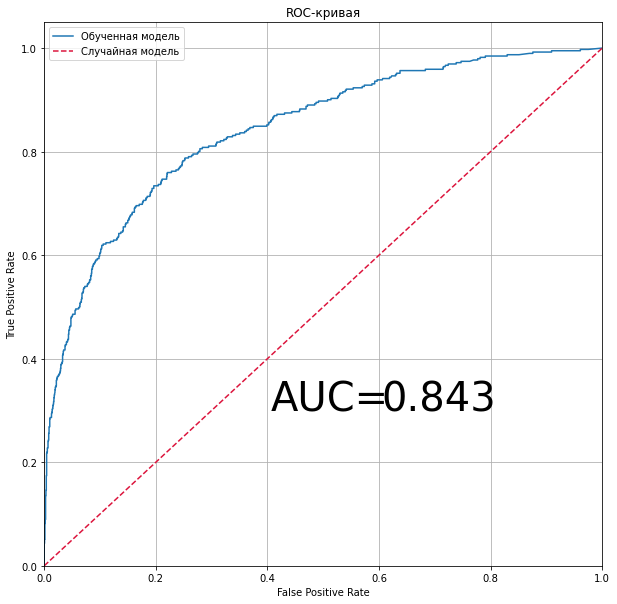

In [176]:
roc_curve_plot(sm_random_model, features_valid_scaled, target_valid) 

### Вывод
Модель имеет хороший график AUC-ROC, что её характеризует как качественную. Балансировка классов однозначно пошла на пользу модели. Однако модель имеет склонность к переобучению.

<div class="alert alert-block alert-success">
<b>Успех:</b> Итоговое тестирование выполнено верно! Ты получил хорошее качество на тесте! Твои выводы приятно читать!
</div>


<div class="alert alert-block alert-info">
<b>Совет: </b> Хорошо бы вынести все полученные оценки метрик: для всех моделей и различных методов для борьбы с дисбалансом.
</div>

## 5.2 Вывод
Параллельно происходило обучение модели дерева решений и модели случайного леса. Модель, имевашая несбалансированные классы, показала плохой результат, F-мера равнялась 0.52, что показало неспособность модели различать ответы. 

При балансировке классом увеличением выборки положительных ответов, качество модели улучшилось, хотя и не было превысходным. Для обоих моделей было проведено масштабирование признаков. Используя балансировку алгоритмом SMOTE и TomekLinks было повышено качество модели. Для данной задачи более подошёл первый алгоритм.



<div class="alert alert-block alert-success">
<b>Успех[2]:</b> С выводами согласен.
</div>


# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*